In [1]:
# import packages
import pandas as pd
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import seaborn as sns
from helper import *
import ipywidgets as widgets

# variables
time_period = (1, 2, 3, 4, 5) # 5 different implementation of progression order  
n_patients = 0 # number of patients included in the model  
n_sessions = 0 # number of sessions included in the model  
usage_time: how many months the patient has been using the app  
usage_freq: how frequent the patient uses the app  

Clean Data

In [2]:
# querying from the SQL database, 2 mins for q3 table

# from connection import *

# con = connect()
# df = SQL("select * from constant_therapy.q3", con)
# df = df.rename(columns={'session_id':"id"})

In [3]:
# 1 min, data saved from previous runs
df = pd.read_csv("data/model_data.csv")
df.head()

/var/folders/vv/6vndbrvd7r1gc7xq3qqx8tfh0000gq/T/ipykernel_33907/2410965418.py:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/model_data.csv")


,id,patient_id,start_time,task_type_id,task_level,domain_ids,domain_scores
0,11018577,2171,2018-04-13 17:37:55,4,1,"6,10","0.2950,0.8140"
1,11018577,2171,2018-04-13 17:37:55,4,1,"6,10","0.2950,0.8140"
2,11018577,2171,2018-04-13 17:37:55,4,1,"6,10","0.2950,0.8140"
3,11018577,2171,2018-04-13 17:37:55,4,1,"6,10","0.2950,0.8140"
4,11018577,2171,2018-04-13 17:37:55,4,1,"6,10","0.2950,0.8140"


In [4]:
df.shape

(80506846, 7)

In [5]:
# 20 seconds
# deficit_ids = df.groupby("patient_id")["deficit_id"].apply(set).reset_index()
# df = df.drop(columns="deficit_id")
# df = df.merge(deficit_ids, on="patient_id", how="left")

In [6]:
# 1 min
# domain_ids = df.groupby("id")["domain_id"].apply(set).reset_index()
# df = df.drop(columns="domain_id")
# df = df.merge(domain_ids, on="id", how="left")

In [7]:
df = df.drop_duplicates(subset="id")

In [8]:
df.head()

,id,patient_id,start_time,task_type_id,task_level,domain_ids,domain_scores
0,11018577,2171,2018-04-13 17:37:55,4,1,"6,10","0.2950,0.8140"
5,11042076,2171,2018-04-15 23:48:00,4,1,"6,10","0.3050,0.8000"
10,11057448,2171,2018-04-16 21:55:03,4,1,"6,10","0.3160,0.7930"
15,11069816,2171,2018-04-17 17:54:54,4,1,"6,10","0.3160,0.8070"
20,11742188,2171,2018-06-05 17:35:50,4,1,"6,10","0.2740,0.8360"


In [9]:
df.nunique()

id               7008614
patient_id         68780
start_time       6693130
task_type_id         173
task_level            12
domain_ids            34
domain_scores     191396
dtype: int64

In [10]:
# df.to_csv("data/consolidate_data_w_ds.csv", index=False)
## careful when reading, will read set as string
# df = pd.read_csv("data/consolidate_data.csv", index_col=[0])
df

,id,patient_id,start_time,task_type_id,task_level,domain_ids,domain_scores
0,11018577,2171,2018-04-13 17:37:55,4,1,"6,10","0.2950,0.8140"
5,11042076,2171,2018-04-15 23:48:00,4,1,"6,10","0.3050,0.8000"
10,11057448,2171,2018-04-16 21:55:03,4,1,"6,10","0.3160,0.7930"
15,11069816,2171,2018-04-17 17:54:54,4,1,"6,10","0.3160,0.8070"
20,11742188,2171,2018-06-05 17:35:50,4,1,"6,10","0.2740,0.8360"
...,...,...,...,...,...,...,...
80506826,41286101,584095,2023-05-22 17:29:53,255,3,12,0.6790
80506830,41465313,584095,2023-05-25 19:56:38,255,3,12,0.6670
80506834,41530297,584095,2023-05-30 03:44:54,255,3,12,0.6670
80506838,41585933,584095,2023-05-31 00:33:20,255,3,12,0.6550


All data has been consolidated, there should be no duplicate sessions for different disorders/domains.
We want to add time_period, usage_time, and usage_freq to the dataset.

**This part doesn't need to be run if it's claire's data**

In [11]:
# progression_order_df = pd.read_csv("data/progression_order.csv", index_col=[0])
# progression_order_df.rename(columns={'time_implemented':'start_time'}, inplace=True)
# progression_order_df["start_time"] = pd.to_datetime(progression_order_df["start_time"])
# df["start_time"] = pd.to_datetime(df["start_time"])

In [12]:
# def time_period_convert(dd):
#     dates = sorted(pd.unique(progression_order_df["start_time"]))
#     if dd < pd.to_datetime(dates[1]):
#         return 1
#     elif dd < pd.to_datetime(dates[2]):
#         return 2
#     elif dd < pd.to_datetime(dates[3]):
#         return 3
#     elif dd < pd.to_datetime(dates[4]):
#         return 4
#     else:
#         return 5

In [13]:
# added time period, takes around 8-9 minutes to run
# df["time_period"] = df["start_time"].apply(time_period_convert)
# df

In [14]:
# progression_order_df["time_period"] = progression_order_df["start_time"].apply(time_period_convert)
# progression_order_df

Adding Usage Time
* this is by patient
* need a patient dataframe vs session dataframe (df)

In [15]:
df["start_time"] = pd.to_datetime(df["start_time"])
df = df.sort_values(by="start_time")

In [16]:
df

,id,patient_id,start_time,task_type_id,task_level,domain_ids,domain_scores
5511562,2361763,45118,2015-09-15 00:33:12,37,1,"1,10,11","0.3570,0.1430,0.8000"
7380488,3553755,62917,2016-04-26 21:21:08,77,1,8,0.0280
11225782,6334548,97021,2017-03-13 00:49:21,79,3,9,0.6000
17344069,8391327,134153,2017-09-21 17:46:51,37,1,"1,10,11","0.3430,0.3640,0.7600"
17245321,8412262,133639,2017-09-23 14:59:22,20,2,1,0.3570
...,...,...,...,...,...,...,...
4080248,41974214,35004,2023-06-22 03:09:03,235,6,14,0.8670
6783830,41976112,54405,2023-06-22 03:15:19,136,6,13,0.5410
6760870,41976113,54405,2023-06-22 03:16:52,13,2,2,0.3800
6765630,41976114,54405,2023-06-22 03:20:17,26,2,5,0.2580


In [17]:
patients = (df.groupby("patient_id")["start_time"].max() - df.groupby("patient_id")["start_time"].min()).reset_index()
patients.columns = ["patient_id", "usage_time"]
patients["usage_time"] = patients["usage_time"].dt.days + 1
patients

,patient_id,usage_time
0,2171,1500
1,2281,1967
2,2466,894
3,2517,1140
4,3882,1
...,...,...
68775,560491,49
68776,565981,57
68777,568669,268
68778,575513,67


Add usage_freq for patient dataframe
* using the simplest way of calculating frequency
* how to get rid of outlier

In [18]:
patients["session_count"] = df.groupby("patient_id")["id"].count().reset_index(name="session_count")["session_count"]
patients["unique_days"] = df.groupby("patient_id")["start_time"].nunique().reset_index(name="days")["days"]
patients

,patient_id,usage_time,session_count,unique_days
0,2171,1500,3221,3221
1,2281,1967,618,618
2,2466,894,12,12
3,2517,1140,1521,1521
4,3882,1,2,2
...,...,...,...,...
68775,560491,49,60,60
68776,565981,57,1105,1105
68777,568669,268,1103,1103
68778,575513,67,118,118


In [19]:
patients["usage_freq"] = patients["unique_days"] / patients["usage_time"]
patients

,patient_id,usage_time,session_count,unique_days,usage_freq
0,2171,1500,3221,3221,2.147333
1,2281,1967,618,618,0.314184
2,2466,894,12,12,0.013423
3,2517,1140,1521,1521,1.334211
4,3882,1,2,2,2.000000
...,...,...,...,...,...
68775,560491,49,60,60,1.224490
68776,565981,57,1105,1105,19.385965
68777,568669,268,1103,1103,4.115672
68778,575513,67,118,118,1.761194


## create training data before outliers are filtered

In [20]:
# given a row of sessions, take domain_ids and domain_scores, which are in string format separated by ",", and replace with a list of the values
def process_row(row):
    values_a = [int(x.strip()) for x in str(row['domain_ids']).split(',')]
    values_b = [float(x.strip()) for x in str(row['domain_scores']).split(',')]
    return values_a, values_b

In [21]:
# take in a dataframe of a patient's session, extract information useful for training
def create_training_data(data: pd.DataFrame):
    # Initialize variables
    session_row = [] # contents of a row (patient id, encoding, cur score, prev score...)
    overall = [] # aggregate of everything (n sessions x 45)

    cur_score = np.zeros((14)) # score for each session
    cur_score.fill(np.nan)
    prev_score = None

    patient_id = data["patient_id"].iloc[0] # save patient_id

    # Sort data by session start time
    data = data.sort_values(by=["start_time"])

    # Process each row
    for idx, row in data.iterrows():
        domains, domain_scores = process_row(row)  # returns a list of domains : int and of domain_scores : float

        for j, domain in enumerate(domains):
            cur_score[domain - 1] = domain_scores[j] # update score in the loop

        # Encode domains for this session
        domain_encoding = np.zeros(14)
        for domain in domains:
            domain_encoding[domain - 1] = 1
        

        # if the session does not contain the target domain or is the first (no prev score), continue in the loop without doing anything, do this before appending
        if prev_score is None or len(domains) > 1:
            session_row = []
            prev_score = cur_score.copy()
            continue
        # assert np.sum(domain_encoding) != 1, "continue not working"

        # append everything in the row list
        session_row.append(patient_id)
        session_row.extend(domain_encoding.copy().tolist())
        session_row.extend(prev_score.copy().tolist())
        session_row.extend(cur_score.copy().tolist())
        session_row.append(row["start_time"])
        session_row.append(row["start_time"].timestamp())
        assert len(session_row) == 45, "session row length incorrect"

        # append row to overall, reset
        overall.append(session_row)
        session_row = []
        prev_score = cur_score.copy()

    # Convert to numpy arrays
    if overall:
        overall = np.array(overall)
        assert len(overall.shape) == 2, "dimensions of overall wrong"
    else:
        # Handle case where scores is empty
        return pd.DataFrame(columns=["patient_id"] + ["domain %d encoding" % i for i in range(1, 15)] +
                                   ["domain %d score" % i for i in range(1, 15)] +
                                   ["domain %d target" % i for i in range(1, 15)] +
                                   ["start_time"] +
                                   ["time_stamp"])
    
        # Create column names
    column_names = (
        ["patient_id"]
        + [f"domain {i} encoding" for i in range(1, 15)]
        + [f"domain {i} score" for i in range(1, 15)]
        + [f"domain {i} target" for i in range(1, 15)]
        + ["start_time"]
        + ["time_stamp"]
    )

    # Create dataframe
    scores_df = pd.DataFrame(overall, columns=column_names)
    scores_df.reset_index(drop=True, inplace=True)
    return scores_df

In [22]:
patients_v1 = df.groupby("patient_id")[df.columns].apply(create_training_data).reset_index(drop=True)

/var/folders/vv/6vndbrvd7r1gc7xq3qqx8tfh0000gq/T/ipykernel_33907/3137644448.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  patients_v1 = df.groupby("patient_id")[df.columns].apply(create_training_data).reset_index(drop=True)


How to remove outlier

In [23]:
from sklearn.cluster import DBSCAN

def filter_datetime_outliers(data, column="start_time", eps_days=14, min_samples=5):
    """
    Filters outlier dates by clustering unique days with DBSCAN.
    
    Parameters:
    - data (pd.DataFrame): DataFrame containing datetime column.
    - column (str): Name of the datetime column.
    - eps_days (int): Max days apart for dates to be considered in the same cluster.
    - min_samples (int): Minimum number of unique days required to form a cluster.
    
    Returns:
    - pd.DataFrame: Filtered DataFrame containing only clustered dates.
    """
    df = data.copy()

    # Convert datetime column to date only (removing time)
    df["date"] = df[column].dt.date

    # Get unique days as a DataFrame
    unique_dates = pd.DataFrame(df["date"].unique(), columns=["date"])

    # Convert unique dates to numerical timestamps (days since epoch)
    unique_dates["timestamp"] = pd.to_datetime(unique_dates["date"]).astype(np.int64) // 10**9

    # Apply DBSCAN clustering on unique dates
    eps_seconds = eps_days * 24 * 60 * 60  # Convert days to seconds
    clustering = DBSCAN(eps=eps_seconds, min_samples=min_samples).fit(unique_dates[["timestamp"]])

    # Assign cluster labels
    unique_dates["cluster"] = clustering.labels_

    # Keep only clustered dates
    clustered_dates = unique_dates[unique_dates["cluster"] != -1]["date"]

    # Filter original DataFrame to keep only records from clustered dates
    filtered_df = df[df["date"].isin(clustered_dates)].drop(columns=["date"])

    return filtered_df


In [24]:
# modified from https://stackoverflow.com/questions/56750841/how-to-trim-outliers-in-dates-in-python
def datetime_outlier(data):
    qa = data["start_time"].quantile(0.2) #lower 10%
    qb = data["start_time"] #higher 10%
    #remove outliers
    xf = data[(data.start_time >= qa) & (data.start_time <= qb)]
    return xf

In [25]:
# about a min
patients_v2 = patients_v1.groupby("patient_id")[patients_v1.columns].apply(filter_datetime_outliers).reset_index(drop=True)

In [26]:
df[df.patient_id == 584095].sort_values(by="start_time")

,id,patient_id,start_time,task_type_id,task_level,domain_ids,domain_scores
80506550,38748396,584095,2022-12-07 01:33:52,134,1,3,0.0370
80506678,38748397,584095,2022-12-07 01:36:22,212,6,5,0.0000
80506554,38840767,584095,2022-12-13 02:41:39,134,1,3,0.0370
80506682,38840768,584095,2022-12-13 02:47:04,212,6,5,0.4200
80506422,38840769,584095,2023-01-06 22:15:03,13,5,2,0.0000
...,...,...,...,...,...,...,...
80506642,41858185,584095,2023-06-17 20:29:23,207,5,12,0.5330
80506478,41858186,584095,2023-06-17 20:46:31,26,4,5,0.5350
80506498,41858187,584095,2023-06-17 20:52:27,26,5,5,0.5350
80506626,41858188,584095,2023-06-21 00:26:53,167,1,"4,5","0.8750,0.5550"


In [27]:
patients_v2[patients_v2.patient_id == 584095].sort_values(by="start_time")

,patient_id,domain 1 encoding,domain 2 encoding,domain 3 encoding,domain 4 encoding,domain 5 encoding,domain 6 encoding,domain 7 encoding,domain 8 encoding,domain 9 encoding,...,domain 7 target,domain 8 target,domain 9 target,domain 10 target,domain 11 target,domain 12 target,domain 13 target,domain 14 target,start_time,time_stamp
4005940,584095,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.687,0.271,NaN,2023-04-26 23:33:24,1682552004.0
4005941,584095,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.687,0.271,NaN,2023-04-27 00:11:58,1682554318.0
4005942,584095,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.687,0.271,NaN,2023-04-27 00:30:09,1682555409.0
4005943,584095,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.687,0.271,NaN,2023-05-10 20:59:20,1683752360.0
4005944,584095,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.687,0.413,NaN,2023-05-16 23:56:18,1684281378.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4005996,584095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.2,NaN,NaN,0.533,0.443,NaN,2023-06-17 20:16:47,1687033007.0
4005997,584095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.2,NaN,NaN,0.533,0.443,NaN,2023-06-17 20:29:23,1687033763.0
4005998,584095,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.2,NaN,NaN,0.533,0.443,NaN,2023-06-17 20:46:31,1687034791.0
4005999,584095,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.2,NaN,NaN,0.533,0.443,NaN,2023-06-17 20:52:27,1687035147.0


In [28]:
patients_v2.nunique()

patient_id              10243
domain 1 encoding           2
domain 2 encoding           2
domain 3 encoding           2
domain 4 encoding           2
domain 5 encoding           2
domain 6 encoding           2
domain 7 encoding           2
domain 8 encoding           2
domain 9 encoding           2
domain 10 encoding          2
domain 11 encoding          1
domain 12 encoding          2
domain 13 encoding          2
domain 14 encoding          2
domain 1 score            393
domain 2 score            198
domain 3 score            465
domain 4 score            325
domain 5 score            482
domain 6 score            424
domain 7 score            372
domain 8 score            376
domain 9 score            321
domain 10 score           618
domain 11 score            51
domain 12 score           634
domain 13 score           725
domain 14 score           438
domain 1 target           393
domain 2 target           198
domain 3 target           464
domain 4 target           324
domain 5 t

In [29]:
patients_filtered = (patients_v2.groupby("patient_id")["start_time"].max() - patients_v2.groupby("patient_id")["start_time"].min()).reset_index()
patients_filtered.columns = ["patient_id", "usage_time"]
patients_filtered["usage_time"] = patients_filtered["usage_time"].dt.days + 1
patients_filtered

,patient_id,usage_time
0,2171,1480
1,2281,1590
2,2517,682
3,4032,331
4,4073,1122
...,...,...
10238,560491,49
10239,565981,57
10240,568669,268
10241,575513,23


In [30]:
patients_filtered["session_count"] = patients_v2.groupby("patient_id").size().reset_index(name="session_count")["session_count"]
patients_filtered["unique_days"] = patients_v2.groupby("patient_id")["start_time"].nunique().reset_index(name="days")["days"]
patients_filtered["usage_freq"] = patients_filtered["unique_days"] / patients_filtered["usage_time"]

Check that the length of patients_filtered is less than or equal to the length of patients

In [31]:
patients

,patient_id,usage_time,session_count,unique_days,usage_freq
0,2171,1500,3221,3221,2.147333
1,2281,1967,618,618,0.314184
2,2466,894,12,12,0.013423
3,2517,1140,1521,1521,1.334211
4,3882,1,2,2,2.000000
...,...,...,...,...,...
68775,560491,49,60,60,1.224490
68776,565981,57,1105,1105,19.385965
68777,568669,268,1103,1103,4.115672
68778,575513,67,118,118,1.761194


In [32]:
patients_filtered

,patient_id,usage_time,session_count,unique_days,usage_freq
0,2171,1480,2231,2231,1.507432
1,2281,1590,287,287,0.180503
2,2517,682,768,768,1.126100
3,4032,331,44,44,0.132931
4,4073,1122,14,14,0.012478
...,...,...,...,...,...
10238,560491,49,16,16,0.326531
10239,565981,57,772,772,13.543860
10240,568669,268,668,668,2.492537
10241,575513,23,54,54,2.347826


## INTERACT
Filter seems to work for time outlier, so we using patient_filtered

In [33]:
# interact to figure out what thresholds to use

@widgets.interact_manual(usage_time=(1, 365), usage_freq=(0.0, 1.0))
def visualize(usage_time, usage_freq):
    temp = patients_filtered[patients_filtered.usage_time > usage_time]
    temp = temp[temp.usage_freq > usage_freq]
    return "number of patients: %d" %(temp["patient_id"].nunique())

interactive(children=(IntSlider(value=183, description='usage_time', max=365, min=1), FloatSlider(value=0.5, d…

In [34]:
# create the according filtered patients dataframe

usage_time = 60 #input("usage time: ")
print("inputted ", usage_time)
usage_freq = 1/7 #input("usage_freq: ")
print("inputted ", usage_freq)

inputted  60
inputted  0.14285714285714285


In [35]:
filtered_patients_list = patients_filtered[patients_filtered.usage_time > float(usage_time)]
filtered_patients_list = filtered_patients_list[filtered_patients_list.usage_freq > float(usage_freq)]

In [36]:
filtered_patients_list.nunique()

patient_id       4505
usage_time       1322
session_count    1609
unique_days      1604
usage_freq       4284
dtype: int64

In [37]:
# create filtered session dataframe from filtered patients data
temp_lst = filtered_patients_list["patient_id"]
sessions_filter_df = patients_v2[patients_v2.patient_id.isin(temp_lst)]
sessions_filter_df

,patient_id,domain 1 encoding,domain 2 encoding,domain 3 encoding,domain 4 encoding,domain 5 encoding,domain 6 encoding,domain 7 encoding,domain 8 encoding,domain 9 encoding,...,domain 7 target,domain 8 target,domain 9 target,domain 10 target,domain 11 target,domain 12 target,domain 13 target,domain 14 target,start_time,time_stamp
0,2171,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.21,NaN,0.63,NaN,NaN,NaN,NaN,NaN,2018-01-04 19:59:49,1515095989.0
1,2171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.18,NaN,0.54,NaN,NaN,NaN,NaN,NaN,2018-01-04 20:10:53,1515096653.0
2,2171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.18,NaN,0.54,0.621,NaN,NaN,NaN,NaN,2018-01-04 20:15:10,1515096910.0
3,2171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.18,NaN,0.54,0.621,NaN,0.514,NaN,NaN,2018-01-04 20:22:14,1515097334.0
4,2171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.18,NaN,0.54,0.621,NaN,0.514,0.794,NaN,2018-01-04 20:35:22,1515098122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4005881,568669,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.882,0.667,0.846,1.0,0.188,0.779,NaN,2023-06-19 17:25:46,1687195546.0
4005882,568669,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.882,0.667,0.846,1.0,0.188,0.779,NaN,2023-06-19 17:33:58,1687196038.0
4005883,568669,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.882,0.667,0.846,1.0,0.188,0.779,NaN,2023-06-19 18:30:57,1687199457.0
4005884,568669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.882,0.667,0.846,1.0,0.188,0.827,NaN,2023-06-19 21:46:22,1687211182.0


In [38]:
# filter based on time_period
# time_period_n = input("time period: ")
# sessions_filter_df = sessions_filter_df[sessions_filter_df.time_period == int(time_period_n)]

In [39]:
sessions_filter_df.to_csv("data/filtered_model_data_v3.csv", index=False)

In [40]:
sessions_filter_df[["patient_id"]].nunique()

patient_id    4505
dtype: int64

In [41]:
sessions_filter_df.shape

(3756151, 45)

In [51]:
sessions_filter_df["start_time"].min()

Timestamp('2017-12-01 04:50:47')

In [42]:
filtered_patients_list[["session_count"]].mean()

session_count    833.773807
dtype: float64

In [48]:
filtered_patients_list["unique_days"].mean()

833.7185349611543

/var/folders/vv/6vndbrvd7r1gc7xq3qqx8tfh0000gq/T/ipykernel_33907/1981890496.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = df1['start_time'].dt.date
/var/folders/vv/6vndbrvd7r1gc7xq3qqx8tfh0000gq/T/ipykernel_33907/1981890496.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = df2['start_time'].dt.date
/var/folders/vv/6vndbrvd7r1gc7xq3qqx8tfh0000gq/T/ipykernel_33907/1981890496.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after se

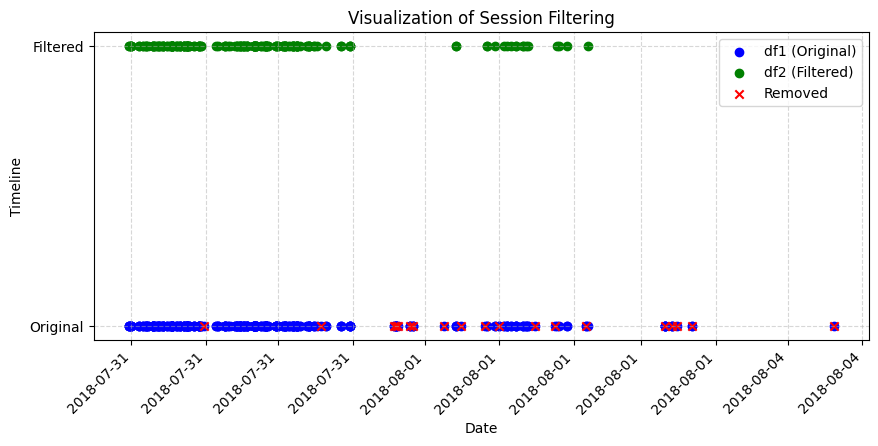

In [53]:
import random

pid = random.choice(pd.unique(sessions_filter_df["patient_id"]))
df1 = df[df.patient_id == pid]
df2 = sessions_filter_df[sessions_filter_df.patient_id == pid]

# Convert start_time to just the date (drop time details)
df1['date'] = df1['start_time'].dt.date
df2['date'] = df2['start_time'].dt.date

# Find missing dates
missing_dates = set(df1['date']) - set(df2['date'])

# Create the figure
fig, ax = plt.subplots(figsize=(10, 4))

# Plot all dates from df1
ax.scatter(df1['date'], [1] * len(df1), label='df1 (Original)', color='blue', marker='o')

# Plot retained dates from df2
ax.scatter(df2['date'], [2] * len(df2), label='df2 (Filtered)', color='green', marker='o')

# Highlight missing dates
for missing in missing_dates:
    ax.scatter(missing, 1, color='red', marker='x', label="Removed" if missing == list(missing_dates)[0] else "")

# Formatting
ax.set_yticks([1, 2])
ax.set_yticklabels(["Original", "Filtered"])
ax.set_xticklabels(df1['date'], rotation=45, ha='right')
plt.xlabel("Date")
plt.ylabel("Timeline")
plt.title("Visualization of Session Filtering")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

In [54]:
missing_dates

{datetime.date(2018, 8, 31),
 datetime.date(2018, 10, 19),
 datetime.date(2018, 11, 18),
 datetime.date(2018, 11, 19),
 datetime.date(2018, 11, 20),
 datetime.date(2018, 11, 25),
 datetime.date(2018, 11, 26),
 datetime.date(2018, 12, 9),
 datetime.date(2018, 12, 16),
 datetime.date(2018, 12, 26),
 datetime.date(2019, 1, 1),
 datetime.date(2019, 1, 16),
 datetime.date(2019, 1, 24),
 datetime.date(2019, 2, 6),
 datetime.date(2019, 3, 11),
 datetime.date(2019, 3, 14),
 datetime.date(2019, 3, 16),
 datetime.date(2019, 3, 22),
 datetime.date(2019, 5, 20)}

In [55]:
df1["date"]

33260245    2018-07-31
33260096    2018-07-31
33260220    2018-07-31
33259923    2018-07-31
33259949    2018-08-01
               ...    
33260149    2019-03-14
33260000    2019-03-16
33260093    2019-03-22
33260150    2019-03-22
33260168    2019-05-20
Name: date, Length: 323, dtype: object

In [56]:
df2["date"]

1968401    2018-07-31
1968402    2018-07-31
1968403    2018-08-01
1968404    2018-08-01
1968405    2018-08-01
              ...    
1968578    2019-01-13
1968579    2019-01-25
1968580    2019-01-26
1968581    2019-01-29
1968582    2019-02-07
Name: date, Length: 182, dtype: object

Bad pipe message: %s [b'\xf0\xf3w\xdfw5\xd5\xda\x9fM"\xdb0\xb8\x9e\xf5\xe5\xbf\x00\x01|\x00\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00/\x000\x001\x002\x003\x004\x005\x006\x007\x008\x009\x00:\x00;\x00<\x00=\x00>\x00?\x00@\x00A\x00B\x00C\x00D\x00E']
Bad pipe message: %s [b"\xd5:{\x06\r\xba\xd4\x10\xbd0J\x7f'\x86 S5\xf7\x00\x01|\x00\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00/\x000\x001\x002\x003\x004\x005\x006\x007\x008\x009\x00:\x00;\x00<\x00=\x00>\x00?\x00@\x00A\x00B\x00C\x00D\x00E\x00F\x00g\x00h\x00i\x00j\x00k\x00l\x00m\x00\x84\x00\x85\x00\x86\x00\x87\x00\x88\x00\x89\x00\x96\x00\x97\x00\x98\x00\x99\x00\x9a\x00\x9b\x00\x9c\x00\x9d\x00\x9e\x00\

Check if there are any duplicate domain ids for each session

In [ ]:
sessions_filter_df[sessions_filter_df["domain_id"].apply(lambda x: len(x) != 1)]

KeyError: 'domain_id'

Bad pipe message: %s [b'\xc5#XO^L\x86\xa8\x99.\xfbK\x01-\xf4@A\xfd\x00\x01|\x00\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00/\x000\x001\x002\x003\x004\x005\x006\x007\x008\x009\x00:\x00;\x00<\x00=\x00>\x00?\x00@\x00A\x00B\x00C\x00D\x00E\x00F\x00g\x00h\x00i\x00j\x00k\x00l\x00m\x00\x84\x00\x85\x00\x86\x00\x87\x00\x88\x00\x89\x00\x96\x00\x97\x00\x98\x00\x99\x00\x9a\x00\x9b\x00\x9c\x00\x9d\x00\x9e\x00\x9f\x00\xa0\x00\xa1\x00\xa2\x00\xa3\x00\xa4\x00\xa5\x00\xa6\x00\xa7\x00\xba\x00\xbb\x00\xbc\x00\xbd\x00\xbe\x00\xbf\x00\xc0\x00\xc1\x00\xc2\x00\xc3\x00\xc4\x00\xc5\x13\x01\x13\x02\x13\x03\x13\x04\x13\x05\xc0\x01\xc0\x02\xc0\x03\xc0\x04\xc0\x05\xc0\x06', b"\xc0\x08\xc0\t\xc0\n\xc0\x0b\xc0\x0c\xc0\r\xc0\x0e\xc0\x0f\xc0\x10\xc0\x11\xc0\x12\xc0\x13\xc0\x14\xc0\x15\xc0\x16\xc0\x17\xc0\x18\xc0\x19\xc0#\xc0$\xc0%\xc0&\xc0'\xc0(\xc

Now that we have the filtered dataframe, we want to start performance metric calculation
* add progression order  
**for now**  
* calculate percentile of each session for each domain
* for each patient, average percentile value across all domains **at the time**, which is our final performance metric calculation

This part doesn not need to be run if it's claire's data

In [ ]:
# expand sessions due to compressed domain
sessions_filter_df = sessions_filter_df.explode("domain_id").reset_index()

In [ ]:
# progression_order_df[progression_order_df.time_period == int(time_period_n)]

In [ ]:
sessions_filter_df.dtypes

In [ ]:
def set_to_int(s):
    if isinstance(s, int): return s
    return s.pop()

In [ ]:
sessions_filter_df["domain_id"] = sessions_filter_df["domain_id"].apply(set_to_int)
sessions_filter_df

get domain scores

In [ ]:
domain_scores = pd.read_csv("data/domain_score.csv")
domain_scores.pop(domain_scores.columns[0])
domain_scores.head()

In [ ]:
def process_row(row):
    values_a = [float(x.strip()) for x in str(row['domain_ids']).split(',')]
    values_b = [float(x.strip()) for x in str(row['domain_scores']).split(',')]
    return values_a, values_b

def expand_dataframe(df):
    new_rows = []
    for _, row in df.iterrows():
        values_a, values_b = process_row(row)
        row['domain_ids'] = values_a
        row['domain_scores'] = values_b
        new_rows.append(row)
    return pd.DataFrame(new_rows)

# Example usage:
data = {'domain_ids': [0.1, "0.2, 0.4, 0.7"],
        'domain_scores': [0.3, "0.5, 0.6, 0.8"],
        'C': [1, 2]}
df = pd.DataFrame(data)
expanded_df = expand_dataframe(df)
print(expanded_df)

In [ ]:
domain_scores_expanded = expand_dataframe(domain_scores)

In [ ]:
domain_scores

In [ ]:
domain_scores_expanded

In [ ]:
df_ds = pd.merge(sessions_filter_df, domain_scores, how='inner', left_on='id', right_on='id', suffixes=('', '_y'))
df_ds.drop(df_ds.filter(regex='_y$').columns, axis=1, inplace=True)
df_ds

In [ ]:
df_ds.drop(["index"], axis=1, inplace=True)

In [ ]:
df_ds.columns

In [ ]:
df_ds_1 = df_ds[["id", "patient_id", "domain_ids", "domain_scores", "start_time_min"]]
df_ds_1

In [ ]:
df_ds_1 = df_ds_1.drop_duplicates(subset="id")

In [ ]:
df_ds_1.to_csv("data/filtered_ds.csv", index=False)

In [ ]:
df_ds_1

progression order code

In [ ]:
# add progression order
# sessions_filter_df = sessions_filter_df.merge(progression_order_df[progression_order_df.time_period == int(time_period_n)], on=["task_type_id", "task_level", "domain_id"]).reset_index()
# sessions_filter_df

Get Percentile

In [ ]:
# get percentile of a domain
# def get_percentile(data):
#     data["percentile"] = data["progression_order"].rank(pct=True)
#     return data

In [ ]:
## get percentile for each domain
# df_pct = sessions_filter_df.groupby("domain_id").apply(get_percentile).reset_index(drop=True)
# df_pct

In [ ]:
## clean dataframe, does not need to be run if Claire's data
# df_pct.drop(df_pct.columns[[0, 11, 16, 17, 19, 20]], axis=1, inplace=True)
# df_pct

In [ ]:
# df_pct.to_csv("data/raw_percentile_time5.csv", index=False)

Get overall

In [ ]:
# take in individual dataframe and output dataframe with overall performance metric
def get_score(data : pd.DataFrame):
    updated_domain_pct = dict() # keeps updated domain pct
    score = 0 # score for each session, an average of all available domains
    scores = []

    data = data.sort_values(by="start_time_min").reset_index(drop=True)

    for idx, row in data.iterrows():
        
        updated_domain_pct[row["domain_ids"]] = row["domain_scores"] # update domain pct to the latest one
        # find sum of all domain pct
        for k, v in updated_domain_pct.items():
            score += float(v)
        # take average of domain pct, add to list, reset score to 0
        score /= len(updated_domain_pct)
        scores.append(score)
        score = 0
    # set score to the score list
    data["score"] = scores
    return data

In [ ]:
df_ds_1 = df_ds_1.drop_duplicates(subset="id")

In [ ]:
df_ds_1.shape

In [ ]:
## get performance metric by each patient for each session
final_df = df_ds_1.groupby("patient_id").apply(get_score).reset_index(drop=True)
final_df

## Question
* right now there are duplicate sessions since domain percentile was calulated separately, how do we feed this to the model?
* task changes visualization -> try to explain the fluctuations
* add overall timeline

* update only the domains that have been practiced
* keep other domains constant
* how much they switch domains

In [ ]:
import random
pid = random.choice(pd.unique(final_df["patient_id"]))
print(pid)

In [ ]:
sns.scatterplot(data=final_df[final_df.patient_id == pid], x="start_time_min", y="score", hue="domain_ids", palette="bright").set_title(pid)
plt.plot(final_df[final_df.patient_id == pid]["start_time_min"], final_df[final_df.patient_id == pid]["score"], 'k')

In [ ]:
sns.lineplot(data=final_df[final_df.patient_id == pid], x="start_time_min", y="domain_scores", hue="domain_ids", palette="bright").set_title(pid)

Second metric calculation:
* keep other domains constant 
* how do we start off each domain -> average of when people first start out or just average

In [ ]:
df_pct

First: average across all sessions

In [ ]:
df_pct.groupby("domain_id")["percentile"].mean()

In [ ]:
# take in individual dataframe and output dataframe with overall performance metric
def get_score_avg(data):
    # initialize score with average
    score = [0.5 for i in range(14)]
    scores = []
    

    data = data.sort_values(by="start_time_min") # sort data by time

    for idx, row in data.iterrows():
        score[row["domain_id"] - 1] = row["percentile"]
        # set score to the score list average
        scores.append(sum(score) / len(score))
    data["score"] = scores
    return data

In [ ]:
## get performance metric by each patient for each session
avg_final_df = df_pct.groupby("patient_id").apply(get_score_avg).reset_index(drop=True)
avg_final_df

Let's look at results

In [ ]:
import random
pid = random.choice(pd.unique(avg_final_df["patient_id"]))
print(pid)
sns.scatterplot(data=avg_final_df[avg_final_df.patient_id == pid], x="start_time_min", y="score", hue="domain_id", palette="bright").set_title(pid)
plt.plot(avg_final_df[avg_final_df.patient_id == pid]["start_time_min"], avg_final_df[avg_final_df.patient_id == pid]["score"])

Second average method: average starting point

In [ ]:
df_pct

In [ ]:
domain_avg = final_df.sort_values(by="start_time_min")
domain_avg = domain_avg.drop_duplicates(subset=["patient_id", "domain_ids"])

In [ ]:
domain_avg["domain_id"].unique()

In [ ]:
lst = list(domain_avg.groupby("domain_ids")["domain_scores"].mean().reset_index()["domain_scores"])
lst

In [ ]:
lst = lst[:10] + [0] + lst[10:]
lst

In [ ]:
# take in individual dataframe and output dataframe with overall performance metric
def get_score_avg2(data):
    # initialize score with average
    global lst
    score = lst
    scores = []
    
    data = data.sort_values(by="start_time_min") # sort data by time

    for idx, row in data.iterrows():
        score[row["domain_id"] - 1] = row["percentile"]
        # set score to the score list average
        scores.append(sum(score) / len(score))
    data["score"] = scores
    return data

In [ ]:
## get performance metric by each patient for each session
avg_final_df2 = df_pct.groupby("patient_id").apply(get_score_avg2).reset_index(drop=True)
avg_final_df2

In [ ]:
import random
pid = random.choice(pd.unique(avg_final_df2["patient_id"]))

print(pid)
sns.scatterplot(data=avg_final_df2[avg_final_df2.patient_id == pid], x="start_time_min", y="score", hue="domain_id", palette="bright").set_title(pid)
plt.plot(avg_final_df2[avg_final_df2.patient_id == pid]["start_time_min"], avg_final_df2[avg_final_df2.patient_id == pid]["score"])

Normalization

In [ ]:
df_pct

In [ ]:
sorted_df = df_pct.sort_values(by="start_time_min")
sorted_df

In [ ]:
# initial score
initial = lst

In [ ]:
column_names = ["domain %d score" % i for i in range(1, 15)]
column_names

In [ ]:
# create domain score columns, input a patient's session data
def create_domain_scores(data):
    global initial
    global column_names
    score = initial
    data = data.sort_values(by="start_time_min")
    scores = np.zeros((len(data), 14))
    i = 0

    for idx, row in data.iterrows():
        score[int(row["domain_ids"] - 1)] = row["domain_scores"]
        # set score to the score list average
        scores[i] = score
        i += 1
    data = pd.concat([data, pd.DataFrame(scores, columns=column_names)], axis=1)
    return data

In [ ]:
scores_df = final_df.groupby("patient_id").apply(create_domain_scores).reset_index(drop=True)
scores_df

In [ ]:
final_df.to_csv("data/domain_scores_CT.csv", index=False)

In [ ]:
# nomralize scores
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# scores only df
scores_df_minmax = MinMaxScaler().fit_transform(scores_df[column_names])

In [ ]:
minmax_df = scores_df
minmax_df[column_names] = scores_df_minmax

In [ ]:
minmax_df.columns

In [ ]:
minmax_df['score'] = minmax_df[column_names].mean(axis=1)
minmax_df

In [ ]:
avg_final_df2[avg_final_df2.patient_id == pid]

In [ ]:
minmax_df[minmax_df.patient_id == pid]

In [ ]:
import random
pid = random.choice(pd.unique(minmax_df["patient_id"]))
print(pid)
sns.scatterplot(data=minmax_df[minmax_df.patient_id == pid], x="start_time_min", y="score", hue="domain_id", palette="bright").set_title(pid)
plt.plot(minmax_df[minmax_df.patient_id == pid]["start_time_min"], minmax_df[minmax_df.patient_id == pid]["score"])

In [ ]:
temp = minmax_df[minmax_df.patient_id == pid]

In [ ]:
sns.lineplot(data=temp, x="start_time_min", y="score", hue="domain_id", palette="bright").set_title(pid)

In [ ]:
sns.lineplot(data=temp, x="start_time_min", y="progression_order", hue="domain_id", palette="bright").set_title(pid)

In [ ]:
temp[["domain_id", "task_type_id", "task_level", "score", "progression_order", "domain 14 score", "start_time_min", "id"]]

Create day-to-day score -> combine sessions of the same domain -> average that then average across domains -> one score for each day instead of each session

Filter out fluctations

In [ ]:
# return false if there's fluctation given a person's data
def fluctate(data):
    data = data.sort_values(by="start_time_min").reset_index() # sort data by time
    d = dict()
    for idx, row in data.iterrows():
        if row["start_time"] not in d:
            d[row["start_time"]] = [row["domain_id"]]
        else:
            if row["domain_id"] in d[row["start_time"]]:
                return False
            else:
                d[row["start_time"]].append(row["domain_id"])
    return True

In [ ]:
filter_lst = minmax_df.groupby("patient_id").apply(fluctate).reset_index()

In [ ]:
filter_lst = filter_lst.rename(columns={0: "a"})
filter_lst

In [ ]:
filter_lst[filter_lst.a]["patient_id"]

In [ ]:
flutuate_data = minmax_df.loc[minmax_df["patient_id"].isin(filter_lst[filter_lst.a]["patient_id"])].reset_index()
flutuate_data

Filtering doesn't seem to work, work on incorporating accuracy

In [ ]:
df_pct

In [ ]:
def new_score(row):
    score = None
    p = [1.05, 1.0, 0.9, 0.8]
    if row.accuracy > .90:
        score = row.percentile * p[0]
    elif row.accuracy > .60:
        score = row.percentile * p[1]
    elif row.accuracy > .40:
        score = row.percentile * p[2]
    else:
        score = row.percentile * p[3]
    return score

In [ ]:
# 12 seconds
df_pscore = df_pct.copy(deep=True)
df_pscore["percentile"] = df_pscore.apply(new_score, axis=1)
df_pscore

In [ ]:
def combine(data):
    data = data.sort_values(by="start_time_min").reset_index() # sort data by time
    return data.groupby(["domain_id", "start_time"])["percentile"].mean().reset_index()

In [ ]:
# create domain score columns, input a patient's session data
def create_domain_scores2(data):
    global initial
    global column_names
    score = initial
    data = data.sort_values(by="start_time_min").reset_index() # sort data by time
    i = 0
    combined_scores = combine(data)
    scores = np.zeros((len(combined_scores), 14))
    combined_scores = combined_scores.sort_values(by="start_time").reset_index()
    for idx, row in combined_scores.iterrows():
        score[row["domain_id"] - 1] = row["percentile"]
        # set score to the score list average
        scores[i] = score
        i += 1
    data = data.drop_duplicates(subset=["domain_id", "start_time"]).reset_index()
    data = pd.concat([data, pd.DataFrame(scores, columns=column_names)], axis=1)
    return data

In [ ]:
df_pscore2 = df_pscore.groupby("patient_id").apply(create_domain_scores2).reset_index(drop=True)
df_pscore2

In [ ]:
column_n = column_names

In [ ]:
scores_df_minmax2 = MinMaxScaler().fit_transform(df_pscore2[column_n])

In [ ]:
minmax_df2 = df_pscore2
minmax_df2[column_n] = scores_df_minmax2

In [ ]:
minmax_df2['score'] = minmax_df2[column_n].mean(axis=1)
minmax_df2

In [ ]:
import random
pid = random.choice(pd.unique(minmax_df2["patient_id"]))
print(pid)
sns.scatterplot(data=minmax_df2[minmax_df2.patient_id == pid], x="start_time_min", y="score", hue="domain_id", palette="bright").set_title(pid)
plt.plot(minmax_df2[minmax_df2.patient_id == pid]["start_time_min"], minmax_df2[minmax_df2.patient_id == pid]["score"], 'k')

In [ ]:
minmax_df2

In [ ]:
temp = df_pct[df_pct.patient_id == 30679]
temp = temp.sort_values(by="start_time_min").reset_index()
temp[temp.domain_id == 10][["accuracy", "progression_order", "percentile"]][temp.progression_order == 3]

In [ ]:
temp = create_domain_scores2(df_pscore[df_pscore.patient_id == 87299])
temp[temp.domain_id == 4][["accuracy", "progression_order", "domain 4 score", "start_time"]]